```{contents}
```

# Ensembling

**Ensembling** is the process of **combining multiple models** (often called *weak learners*) to create a **stronger overall model**.

* **Goal:** Improve predictive performance and reduce errors.
* **Motivation:** A single model may make mistakes due to bias or variance. By combining models, we **average out errors**.

---

## **2. Why Ensembling Works**

* Different models make **different errors**.
* If errors are **uncorrelated**, averaging or voting can **cancel them out**.
* Leads to better **generalization** on unseen data.

**Example (Intuition):**

* Suppose 3 models predict the price of a house:

  * Model A → 100k
  * Model B → 120k
  * Model C → 110k
* Ensemble (average) → 110k → closer to actual value than any single model.

---

## **3. Types of Ensembling**

There are **two main types**: **Bagging** and **Boosting**.

---

### **A. Bagging (Bootstrap Aggregating)**

**Idea:** Train multiple models independently on **different random subsets** of data, then combine predictions.

**Steps:**

1. Sample dataset **with replacement** (bootstrap) to create multiple subsets.
2. Train a model on each subset (e.g., Decision Tree).
3. **Aggregate predictions**:

   * Regression → average
   * Classification → majority vote

**Characteristics:**

* Reduces **variance**
* Prevents **overfitting** of a single model

**Example:** Random Forest

* Each tree sees a different subset of data and features.
* Predictions are averaged → smoother, more stable.

---

### **B. Boosting**

**Idea:** Train models **sequentially**, each learning from the **errors of the previous model**.

**Steps:**

1. Train the first weak learner.
2. Identify the mistakes it made.
3. Train the next learner to **focus more on the mistakes**.
4. Repeat and combine all learners into a weighted sum.

**Characteristics:**

* Reduces **bias**
* Can overfit if too many learners or learning rate too high

**Popular Boosting Algorithms:**

* AdaBoost
* Gradient Boosting
* XGBoost, LightGBM, CatBoost

---

### **C. Stacking (Stacked Generalization)**

**Idea:** Combine predictions of multiple models using a **meta-model**.

**Steps:**

1. Train multiple base models on the dataset.
2. Use their predictions as features to train a **meta-model**.
3. Meta-model learns **how to best combine** the base models.

**Characteristics:**

* Can leverage **diverse model types**
* Often improves accuracy beyond Bagging or Boosting

---

## **4. Benefits of Ensembling**

* Better **accuracy and stability**
* Reduces **variance and/or bias**
* Makes models more **robust to noise and outliers**

---

## **5. Trade-offs / Limitations**

* **Complexity:** Harder to interpret than a single model
* **Training time:** Can be much slower (many models instead of one)
* **Memory usage:** Stores multiple models

---

### **Summary Table**

| Type     | How it Works                          | Reduces         | Example                 |
| -------- | ------------------------------------- | --------------- | ----------------------- |
| Bagging  | Train on random subsets independently | Variance        | Random Forest           |
| Boosting | Train sequentially, focus on errors   | Bias            | AdaBoost, GradientBoost |
| Stacking | Combine predictions using meta-model  | Bias + Variance | Stacked models          |

---

Ensembling is basically **“strength in numbers”** — multiple weak models together usually perform much better than one alone.

---


Decision Tree: R²=0.71, RMSE=0.35
Random Forest (Bagging): R²=0.78, RMSE=0.31
Gradient Boosting (Boosting): R²=0.80, RMSE=0.29


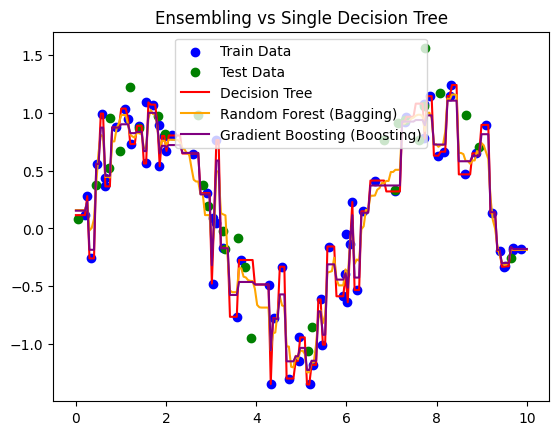

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Create Sample Dataset
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize Models
dt = DecisionTreeRegressor(max_depth=None, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 4: Train Models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# Step 5: Predictions
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_dt = dt.predict(X_plot)
y_rf = rf.predict(X_plot)
y_gbr = gbr.predict(X_plot)

# Step 6: Metrics
def print_metrics(name, y_true, y_pred):
    print(f"{name}: R²={r2_score(y_true, y_pred):.2f}, RMSE={np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

print_metrics("Decision Tree", y_test, dt.predict(X_test))
print_metrics("Random Forest (Bagging)", y_test, rf.predict(X_test))
print_metrics("Gradient Boosting (Boosting)", y_test, gbr.predict(X_test))

# Step 7: Plot Predictions
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_plot, y_dt, color='red', label='Decision Tree')
plt.plot(X_plot, y_rf, color='orange', label='Random Forest (Bagging)')
plt.plot(X_plot, y_gbr, color='purple', label='Gradient Boosting (Boosting)')
plt.legend()
plt.title("Ensembling vs Single Decision Tree")
plt.show()
